# Import libraries

### Pandas
### Numpy
### Seaborn
## Matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

### Read the CSV File 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Regression_Models\GDR Regression/drug_regression_data.csv")

### Explore the Data

In [3]:
df.head()

,Drug_Class,Dosage,Age,Duration,Effectiveness_Score
0,Antiviral,290,27,12,40.518511
1,Vaccine,352,36,2,40.651832
2,Antibiotic,260,34,5,32.386117
3,Antiviral,355,38,1,38.257148
4,Antiviral,422,31,7,48.320204


### Remove Irrelevant Columns

In [4]:
df.shape

(500, 5)

### Import Label Encdoer from sklearn with Module preprocessing for convert categorical data into Numerical 

In [5]:
from sklearn.preprocessing import LabelEncoder

### Apply Label Encoder

In [6]:
le = LabelEncoder()
df["Drug_Class"] = le.fit_transform(df["Drug_Class"])

### Check the country column convert into numerical or not (sucessfully converted into numerical)

In [7]:
df.head()

,Drug_Class,Dosage,Age,Duration,Effectiveness_Score
0,1,290,27,12,40.518511
1,3,352,36,2,40.651832
2,0,260,34,5,32.386117
3,1,355,38,1,38.257148
4,1,422,31,7,48.320204


### Check the Null Values

In [8]:
df.isnull().sum()

Drug_Class             0
Dosage                 0
Age                    0
Duration               0
Effectiveness_Score    0
dtype: int64

### Check Inofrmation about the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Drug_Class           500 non-null    int64  
 1   Dosage               500 non-null    int64  
 2   Age                  500 non-null    int64  
 3   Duration             500 non-null    int64  
 4   Effectiveness_Score  500 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


### Check the Stastistical Summary of the data

In [10]:
df.describe()

,Drug_Class,Dosage,Age,Duration,Effectiveness_Score
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.564000,562.190000,43.524000,7.354000,58.895809
std,1.152632,268.603711,15.338839,4.118569,15.869124
min,0.000000,100.000000,18.000000,1.000000,20.695890
25%,1.000000,318.500000,30.000000,4.000000,46.503521
50%,2.000000,573.000000,43.000000,7.000000,59.738296
75%,3.000000,796.250000,57.000000,11.000000,70.884605
max,3.000000,997.000000,69.000000,14.000000,91.365123


### Check the outlier in data with the boxplot

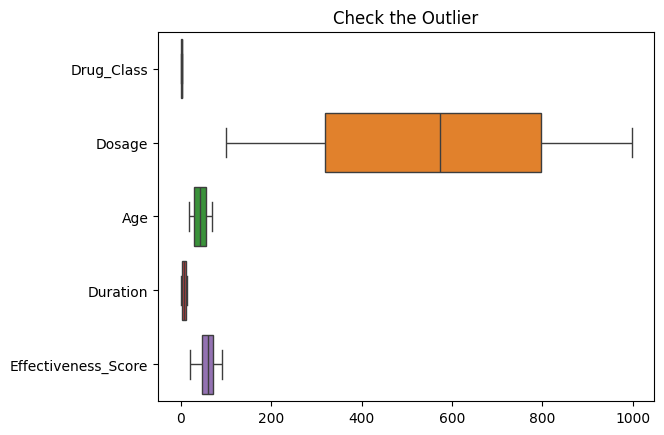

In [11]:
sns.boxplot(data=df,orient='h')
plt.title("Check the Outlier")
plt.show()

### Check the relationship between the columns through pairplot 

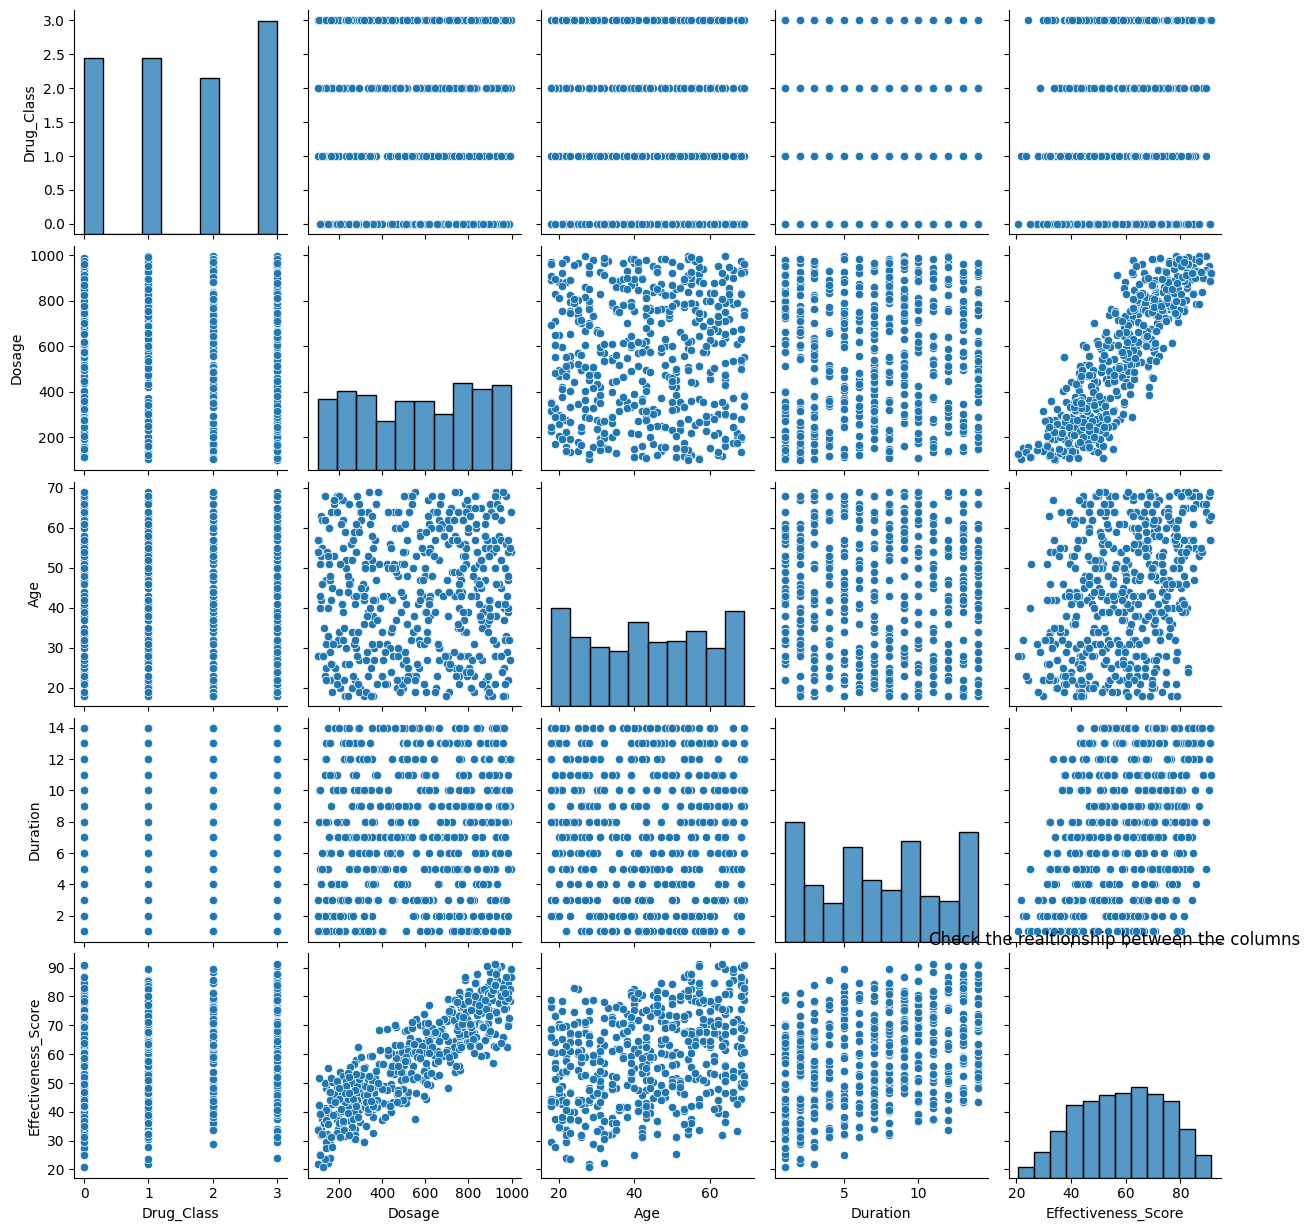

In [12]:
sns.pairplot(data=df)
plt.title("Check the realtionship between the columns")
plt.show()

### Check the co-relationship between the column through heatmap

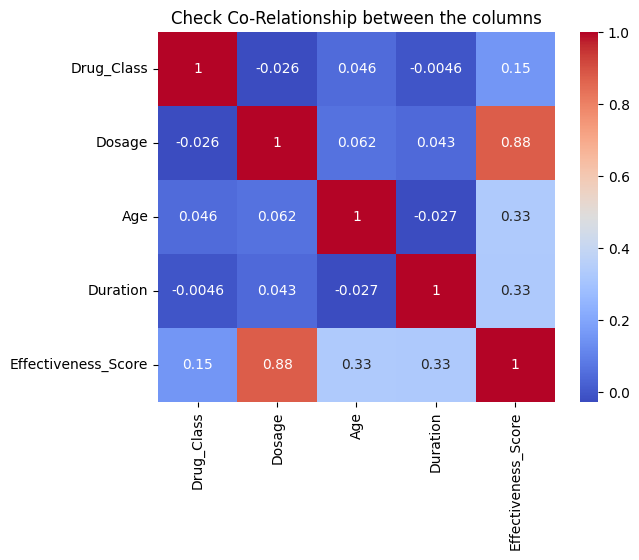

In [13]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Check Co-Relationship between the columns")
plt.show()

### Split the data in x and y (Dependent & Independent Variable)

In [14]:
x = df.iloc[:,:-1]
y = df[["Effectiveness_Score"]]

### Import Train Test Split From sklearn module model_selection for spliting the data in Training and Testing 

In [15]:
from sklearn.model_selection import train_test_split

### Split the data in traning and testing 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Import StandardSclaer From sklearn module preprocessing  for Scalling the Data

In [17]:
from sklearn.preprocessing import StandardScaler

### Apply Standard Scaler

In [18]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Import Machine Learning Model TweedieRegressor from sklearn module Linear Model

In [19]:
from sklearn.linear_model import TweedieRegressor

### Apply/Fit the model

In [20]:
tr = TweedieRegressor(power=0, alpha=0.5)
tr.fit(x_train,y_train)

C:\Users\zabiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,power,0
,alpha,0.5
,fit_intercept,True
,link,'auto'
,solver,'lbfgs'
,max_iter,100
,tol,0.0001
,warm_start,False
,verbose,0


### Predict the value

In [21]:
df["Prediction"] = tr.predict(x)
df.head()

,Drug_Class,Dosage,Age,Duration,Effectiveness_Score,Prediction
0,1,290,27,12,40.518511,44.952282
1,3,352,36,2,40.651832,42.642969
2,0,260,34,5,32.386117,35.980604
3,1,355,38,1,38.257148,39.005126
4,1,422,31,7,48.320204,47.086162


### Import Metrics from sklearn to check overall performace of the model¶

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Check the Performance

In [23]:
y_pred = tr.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 2.46
📉 MSE: 10.14
📉 RMSE: 3.18
🎯 R² Score: 95.84


### Check the Performance of the model through Data Visualization 

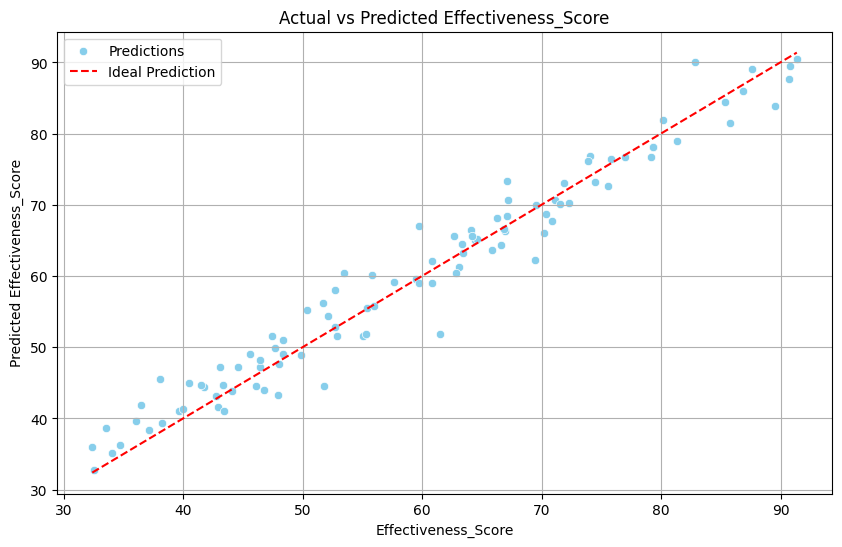

In [24]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='skyblue', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Effectiveness_Score")
plt.ylabel("Predicted Effectiveness_Score")
plt.title("Actual vs Predicted Effectiveness_Score")
plt.legend()
plt.grid(True)
plt.show()


## 📌 Conclusion

In this project, we implemented a **Tweedie Regressor**, a flexible regression technique that can model different types of distributions (Normal, Poisson, and compound Poisson-Gamma) depending on the chosen `power` parameter.  
The workflow included:
- Data loading and preprocessing  
- Splitting data into training and testing sets  
- Model training using Tweedie Regression  
- Evaluation using MAE, MSE, RMSE, and R² Score  

**Model Performance:**
- 📉 MAE: 2.46  
- 📉 MSE: 10.14  
- 📉 RMSE: 3.18  
- 🎯 R² Score: 95.84%  

These results demonstrate **strong predictive accuracy**, with the model explaining a high proportion of variance while maintaining a reasonable error margin.  
The Tweedie Regressor proved to be a solid choice for this dataset, offering flexibility and robustness in handling different distributional characteristics.  

Future improvements could include:
- Incorporating **cross-validation** to ensure stability across different folds  
- Performing **hyperparameter tuning** (e.g., `power`, `alpha`, `link`) for optimized performance  
- Comparing against other regression models (such as Ridge, Lasso, and Gradient Boosting) to validate results  
- Enhancing **model interpretability** using feature importance or permutation analysis  
